In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import Curves2D

In [2]:
# Simulacion y archivo de datos

simu='RefL0100N1504'
snap='28'

folder='/home/ramiro/Facultad/Tesis/Python/Actividad 3/'
file_table='galaxias_'+simu+'_snap_'+snap+'.dat'
path_data=folder+file_table

data=ascii.read(path_data)

In [3]:
# Mostrar las keys de 'dada', por las dudas...
print(data.keys())

['GalaxyID', 'Redshift', 'SnapNum', 'SubGroupNumber', 'CentreOfPotential_x', 'CentreOfPotential_y', 'CentreOfPotential_z', 'Stars_Mass', 'SF_Mass', 'NSF_Mass', 'MassType_DM', 'MassType_BH', 'HalfMassRad_Star', 'HalfMassRad_Gas', 'HalfMassRad_DM', 'Stars_Hydrogen', 'Stars_Oxygen', 'Stars_Metallicity', 'SF_Hydrogen', 'SF_Oxygen', 'SF_Metallicity', 'NSF_Hydrogen', 'NSF_Oxygen', 'NSF_Metallicity', 'StarFormationRate', 'InitialMassWeightedStellarAge']


In [4]:
# Definir nuevas variables, si es necesario
data['sSFR']=data['StarFormationRate']/data['Stars_Mass']
data['SF_Frac']=data['SF_Mass']/(data['SF_Mass']+data['Stars_Mass'])
data['Baryonic_Mass']=data['Stars_Mass']+data['SF_Mass']+data['NSF_Mass']

In [5]:
# Condiciones para seleccionar muestra
mask=(data['Stars_Mass']>=1e9) & (data['BlackHoleMass']>0)

KeyError: 'BlackHoleMass'

In [6]:
# Variables a graficar
xvar=np.log10(data['Stars_Mass'][mask])
yvar=np.log10(data['BlackHoleMass'][mask])

NameError: name 'mask' is not defined

In [7]:
# Parmetros para determinar la curva mediana y errores
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

NameError: name 'xvar' is not defined

No handles with labels found to put in legend.


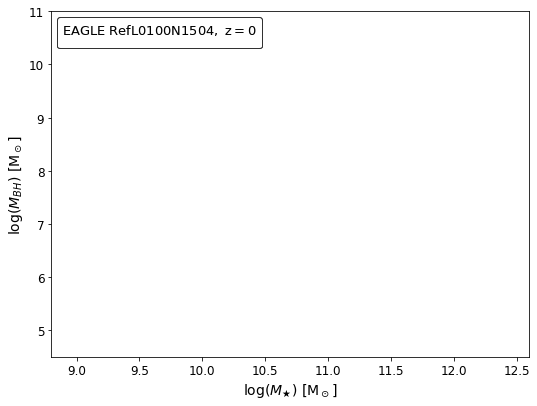

In [8]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(8.8,12.6)
ylim=(4.5,11)

xlabel=r'$\log(M_\bigstar) \ [\rm{M}_\odot]$'
ylabel=r'$\log(M_{BH}) \ [\rm{M}_\odot]}$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
#ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

#----------------------------------------------------------------------------------------------------
# Curva mediana simple con marcadores

#ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

#----------------------------------------------------------------------------------------------------
# Curva mediana con barras de error y marcadores

#ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='b',marker='o',markersize=8,linestyle='-',
#            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

#----------------------------------------------------------------------------------------------------

# Curva mediana con barras de error, con marcadores 'especiales' si hay pocos elementos

# Mascara para graficar solo bines con cierto numero de elementos
#mask_lim=(elements>=100)

# Curva mediana con barras de error, sin marcadores
#ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='b',marker='',linestyle='-',
#            linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# Marcadores
#scat1=ax.scatter(xmedian[~mask_lim],ymedian[~mask_lim],s=80,edgecolor='b',facecolors='w',
#                 label=r'$N < 100$')

#scat2=ax.scatter(xmedian[mask_lim],ymedian[mask_lim],s=80,color='b',
#                 label=r'$N\ \geqslant \ 100$')

#leg2=ax.legend(edgecolor='w',loc='lower right',handles=[scat1,scat2],fontsize=12)

ax.add_artist(leg1)

#-----------------------------------------------------------------------------------------------------



plt.show()
#plt.savefig('prueba_scatter.png')